In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
def get_DFT_mat(v, inverse=False):
    ''' Returns the DFT of image.
        Calculated by multiplying the rotated image and DFT matrix (same as getting the DTF of every row).
        if argument inverse==True: method returns the inverse-DFT multiplication, meaning it
        returns it from DFT represantation to actual values).
    '''
    v_np = np.array(v)
    DFT_size = v.shape[1]
    DFT_mat = np.empty(shape=(DFT_size,DFT_size), dtype=complex)
    conjugate = -1 if inverse==False else 1
    w = np.power(np.e, (conjugate*2j)*np.pi/DFT_size, dtype=complex)
    for i in range(DFT_size):
        for j in range(DFT_size):
            DFT_mat[i,j] = np.power(w, i*j, dtype=complex)
    return (1/np.sqrt(DFT_size)) * np.transpose(DFT_mat @ np.transpose(v_np))

In [5]:
# Opening the images
orig_img = Image.open(r"./mandril_original.png").convert('L')
dist_img = Image.open(r"./mandril_distorted.png").convert('L')

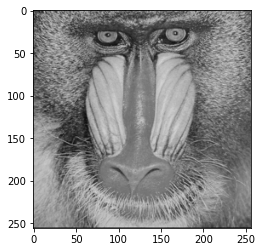

In [6]:
# Showing the original image
plt.imshow(np.matrix(orig_img), cmap='gray', vmin=0, vmax=255)

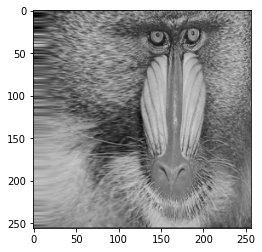

In [7]:
# Showing the distorted image
plt.imshow(np.matrix(dist_img), cmap='gray', vmin=0, vmax=255)

Q. 1. a

In [8]:
# Computing the DFT representation coefficients
A = get_DFT_mat(np.matrix(orig_img)) / 255.0
B = get_DFT_mat(np.matrix(dist_img)) / 255.0

# real values of coefficients
A_real = np.real(A)
B_real = np.real(B)

# imaginary values of coefficients
A_imag = np.imag(A)
B_imag = np.imag(B)

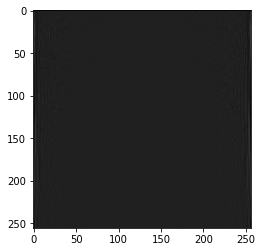

In [9]:
plt.imshow(A_real, cmap='gray')
# print(A_real)

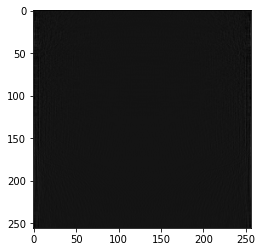

In [10]:
plt.imshow(B_real, cmap='gray')
# print(B_real)

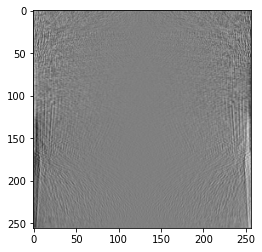

In [11]:
plt.imshow(A_imag, cmap='gray')
# print(A_imag)

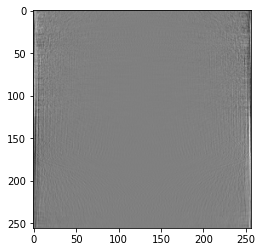

In [12]:
plt.imshow(B_imag, cmap='gray')
# print(B_imag)

Q. 1. b

In [13]:
# First we'll show that A is of full rank:
u, s, vh = np.linalg.svd(A)
print(np.amin(s), np.amax(s))
# since A's singular values are non-zero, it is of full rank.

0.0014387380716407996 131.51474807971974


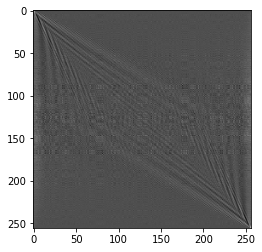

In [14]:
# Calculating the coefficiants of the estimated functional map C
# least squares solution
C = np.linalg.pinv(A) @ B

# Printing the real values of C
plt.imshow(np.real(C), cmap='gray')
# print(np.real(C))

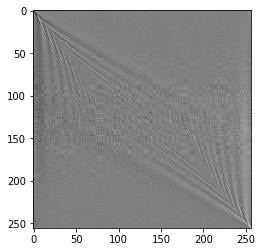

In [15]:
# Printing the imaginary values of C
plt.imshow(np.imag(C), cmap='gray')
# print(np.imag(C))

Q. 1. c

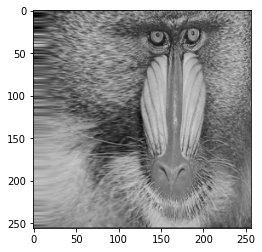

In [16]:
# distorting the original image using calculated C
our_dist = get_DFT_mat(A @ C, inverse=True)
plt.imshow(np.real(our_dist), cmap='gray', vmin=0, vmax=1)

Q. 1. d

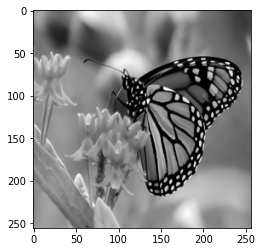

In [17]:
# Opening the original image
orig_butterfly = np.matrix(Image.open(r"./Butterfly_.png").convert('L'))
plt.imshow(orig_butterfly, cmap='gray', vmin=0, vmax=255)

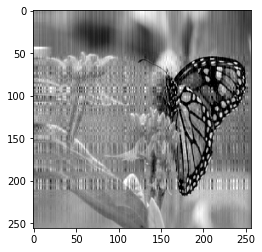

In [18]:
# Distorting the image using C
dist_butterfly = get_DFT_mat(get_DFT_mat(orig_butterfly) @ C, inverse=True)
plt.imshow(np.real(dist_butterfly), cmap='gray', vmin=0, vmax=255)
plt.imsave("dist_butterfly.png",np.real(dist_butterfly), cmap='gray', vmin=0, vmax=255)